### Part 1: Library Import

In [17]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

### Part 2: Simple Linear Regression

In [18]:
Boston = load_data('Boston')
Boston.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4


In [25]:
# Fit a model using only 1 predictor
X = pd.DataFrame({
    'intercept': np.ones(Boston.shape[0]),
    'lstat': Boston['lstat']
})
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()
print(summarize(results))

              coef  std err       t  P>|t|
intercept  34.5538    0.563  61.415    0.0
lstat      -0.9500    0.039 -24.528    0.0


In [56]:
# Make prediction and observe [prediction interval] is wider than [confidence interval]
new_df = pd.DataFrame({
    'intercept': np.ones(3),
    'lstat': [5, 10, 15]
})
new_pred = results.get_prediction(new_df)
print(f'Predicted values: \n{new_pred.predicted_mean}')
print()
print(f'Confidence interval: \n{new_pred.conf_int(alpha=0.05)}')
print(f'Prediction interval: \n{new_pred.conf_int(obs=True, alpha=0.05)}')

Predicted values: 
[29.80359411 25.05334734 20.30310057]

Confidence interval: 
[[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]
Prediction interval: 
[[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


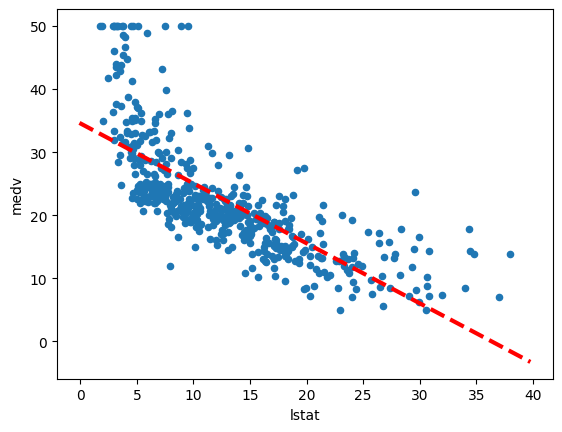

In [55]:
# Regression line plot
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params.iloc[0], results.params.iloc[1], 'r--', linewidth=3)
    

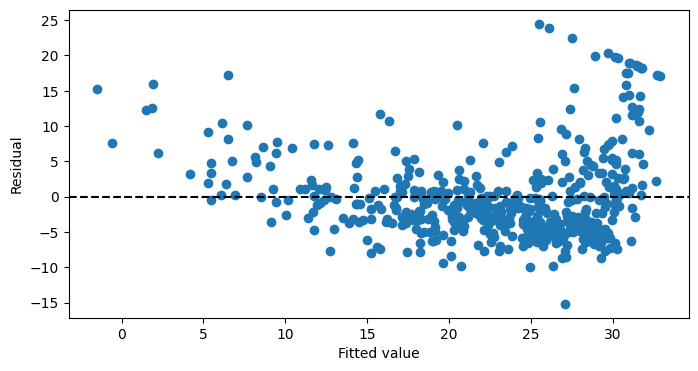

In [48]:
# Residual plot
ax = subplots(figsize=(8, 4))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

np.int64(374)

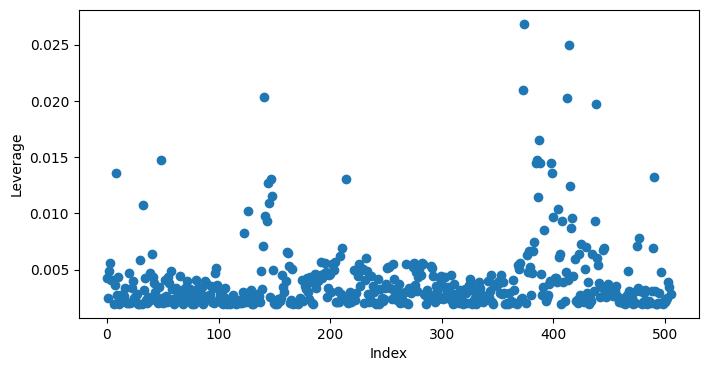

In [53]:
# Leverage plot
infl = results.get_influence()
ax = subplots(figsize=(8, 4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)